In [95]:
import pandas as pd
import numpy as np 
import sklearn as sk
import seaborn as sns
import pyodbc
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from tabulate import tabulate

# Querying Data From Azure SQL Database

In [2]:
#Connection Details
SERVER = 'tx-dot-dev-sqlsvr.database.windows.net'
DATABASE = 'TX-DOT-DEV-DB'
USERNAME = 'sysadmin'
PWD = 'N0ru_Mu5k09a9'
TABLE = "Public_Project_Data"

driver= '{ODBC Driver 17 for SQL Server}'  

In [3]:
connection_string = 'DRIVER=' + driver + \
                    ';SERVER=' + SERVER + \
                    ';PORT=1433' + \
                    ';DATABASE=' + DATABASE + \
                    ';UID=' + USERNAME + \
                    ';PWD=' + PWD

In [4]:
# Converts Data From Database Table to a DataFrame

sql = 'SELECT * FROM [stg].[Analysis_Ready_Data]'
conn = pyodbc.connect(connection_string)
cursor = conn.cursor()
df = pd.read_sql(sql, conn)

In [5]:
df.head(n=5)

,index,county,let_date,type,time,highway,length,check,misc_cost,estimate,bid,over/under,bidder,winning_bidder,date_accessed,id
0,0,HOWARD,2015-05-05,"EMB, EXC, STRS, SET, SURF, MBGF",311 WORKING DAYS,FM 846,25.898,100000.0,15000.0,10710570.05,9519743.52,-11.12,"SBBI, INC.","SBBI, INC.",2019-06-21,3055
1,1,HOWARD,2015-05-05,"EMB, EXC, STRS, SET, SURF, MBGF",311 WORKING DAYS,FM 846,25.898,100000.0,15000.0,10710570.05,10089270.77,-5.80,"DELHUR INDUSTRIES, INC.","SBBI, INC.",2019-06-21,3055
2,2,HOWARD,2015-05-05,"EMB, EXC, STRS, SET, SURF, MBGF",311 WORKING DAYS,FM 846,25.898,100000.0,15000.0,10710570.05,11121238.96,+3.83,"REECE ALBERT, INC.","SBBI, INC.",2019-06-21,3055
3,3,HOWARD,2015-05-05,"EMB, EXC, STRS, SET, SURF, MBGF",311 WORKING DAYS,FM 846,25.898,100000.0,15000.0,10710570.05,11698754.12,+9.23,"PRICE CONSTRUCTION, LTD.","SBBI, INC.",2019-06-21,3055
4,4,HOWARD,2015-05-05,"EMB, EXC, STRS, SET, SURF, MBGF",311 WORKING DAYS,FM 846,25.898,100000.0,15000.0,10710570.05,13838689.93,+29.21,"ALLEN BUTLER CONSTRUCTION, INC.","SBBI, INC.",2019-06-21,3055


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18952 entries, 0 to 18951
Data columns (total 16 columns):
index             18952 non-null int64
county            18952 non-null object
let_date          18952 non-null object
type              18952 non-null object
time              18952 non-null object
highway           18952 non-null object
length            18952 non-null float64
check             18952 non-null float64
misc_cost         18952 non-null float64
estimate          18952 non-null float64
bid               18952 non-null float64
over/under        18952 non-null object
bidder            18952 non-null object
winning_bidder    18952 non-null object
date_accessed     18952 non-null object
id                18952 non-null int64
dtypes: float64(5), int64(2), object(9)
memory usage: 2.3+ MB


In [82]:
print('\033[1m' + 'Number of Null Objects by Column ' + '\033[0m')
df.isnull().sum()

Number of Null Objects by Column 


index             0
county            0
let_date          0
type              0
time              0
highway           0
length            0
check             0
misc_cost         0
estimate          0
bid               0
over/under        0
bidder            0
winning_bidder    0
date_accessed     0
id                0
dtype: int64

In [84]:
df['unique_id']  = df['let_date'].astype(str)+df['id'].astype(str)

In [88]:
print(tabulate([['Number of Unique Counties: %d' %(df['county'].nunique())],['Number of Unique Bidders: %d' %(df['bidder'].nunique())]
                ,['Number of Unique Winning_Bidders: %d' %(df['winning_bidder'].nunique())],['Number of Unique Project Types: %d' %(df['type'].nunique())]
                ,['Number of Unique Project: %d' %(df['unique_id'].nunique())]],numalign="right",tablefmt="fancy_grid"))

╒═══════════════════════════════════════╕
│ Number of Unique Counties: 249        │
├───────────────────────────────────────┤
│ Number of Unique Bidders: 714         │
├───────────────────────────────────────┤
│ Number of Unique Winning_Bidders: 544 │
├───────────────────────────────────────┤
│ Number of Unique Project Types: 2159  │
├───────────────────────────────────────┤
│ Number of Unique Project: 4195        │
╘═══════════════════════════════════════╛


In [81]:
tabulate.PRESERVE_WHITESPACE = True
tabulate.WIDE_CHARS_MODE = False
print('\033[1m' + 'Ordered by Number of Occurences' + '\033[0m')
print(tabulate([[df['bidder'].value_counts().nlargest(5),df['winning_bidder'].value_counts().nlargest(5),df['type'].value_counts().nlargest(5)]], headers=['Bidder', 'Winning Bidder', 'Type'],numalign="right",tablefmt="fancy_grid"))

Ordered by Number of Occurences
╒══════════════════════════════════════╤════════════════════════════════════════╤══════════════════════════════════════╕
│ Bidder                               │ Winning Bidder                         │ Type                                 │
╞══════════════════════════════════════╪════════════════════════════════════════╪══════════════════════════════════════╡
│ FNH CONSTRUCTION, LLC            665 │ ANGEL BROTHERS HOLDINGS CORP.      460 │ REPLACE BRIDGE AND APPROACHES    868 │
│ ANGEL BROTHERS HOLDINGS CORP.    492 │ HUNTER INDUSTRIES, LTD.            373 │ SAFETY TREAT FIXED OBJECTS       313 │
│ CHAMPION INFRASTRUCTURE, LLC     382 │ KNIFE RIVER CORPORATION - SOUTH    291 │ OVERLAY                          186 │
│ HUNTER INDUSTRIES, LTD.          272 │ BIG CREEK CONSTRUCTION, LTD.       275 │ SEAL COAT                        175 │
│ A. L. HELMCAMP, INC.             268 │ STATELINE CONSTRUCTION, LLC        267 │ BRIDGE REPLACEMENT               172 │


In [55]:
print(tabulate([[df['bid'].describe(),df['estimate'].describe(),df['length'].describe()]], headers=['Bid Info', 'Estimate Info', 'Length Info'],numalign="right",tablefmt="fancy_grid"))

╒═══════════════════════════╤════════════════════════════════╤══════════════════════════════╕
│ Bid Info                  │ Estimate Info                  │ Length Info                  │
╞═══════════════════════════╪════════════════════════════════╪══════════════════════════════╡
│ count    1.895200e+04     │ count    1.895200e+04          │ count    18952.000000        │
│ mean     5.481644e+06     │ mean     4.932863e+06          │ mean        12.220253        │
│ std      2.255999e+07     │ std      1.815259e+07          │ std         56.027647        │
│ min      1.000000e-02     │ min      5.376000e+03          │ min          0.000000        │
│ 25%      4.209439e+05     │ 25%      3.627720e+05          │ 25%          0.001000        │
│ 50%      1.164830e+06     │ 50%      1.025040e+06          │ 50%          0.300000        │
│ 75%      3.520231e+06     │ 75%      3.283657e+06          │ 75%          4.806000        │
│ max      1.104602e+09     │ max      4.578352e+08         

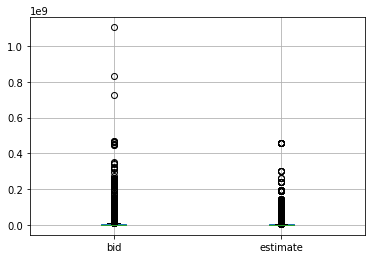

In [80]:
df.boxplot(column=['bid', 'estimate'])

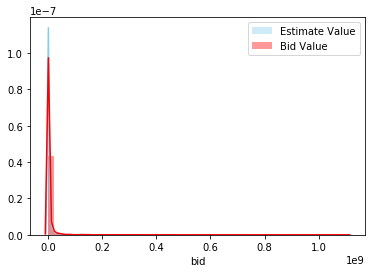

In [99]:
sns.distplot( df["estimate"] , color="skyblue", label="Estimate Value")
sns.distplot( df["bid"] , color="red", label="Bid Value")
plt.legend()
plt.show()

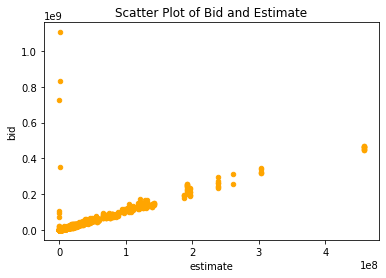

In [77]:
df.plot(kind='scatter',x='estimate',y='bid',color='orange',title='Scatter Plot of Bid and Estimate')

In [71]:
print('\033[1m' + 'Number of Outliers by Column' + '\033[0m')

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Number of Outliers by Column


bid               2361
bidder               0
check                0
county               0
date_accessed        0
estimate          2357
highway              0
id                7553
index                0
length            2411
let_date             0
misc_cost         2682
over/under           0
time                 0
type                 0
winning_bidder       0
dtype: int64